# Tree-based Methods

The materials used in this tutorial are based on the applied exercises provided in the book "An Introduction to Statistical Learning with Applications in R" (ISLR). We are trying to demonstrate how to implement the following tree based method:

* Decision tree
* Random forest 
* Bagging 


First you need to install libraries

```r
install.packages("tree")
install.packages("randomForest")
```

In [1]:
# install.packages("tree")

In [2]:
# install.packages("randomForest")

In [3]:
# install.packages("glmnet", dependencies=TRUE)

In [4]:
# install.packages("gbm", dependencies=TRUE)

In [5]:
#load all the libraries
library(tree)
library(randomForest)
library(glmnet)
library(gbm)
library(ISLR)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.

Loading required package: Matrix

Loaded glmnet 3.0-2


Loaded gbm 2.1.5



## 1. Predict purchase in OJ dataset


OJ dataset (orange juice): The data contains 1070 purchases where the customer either purchased Citrus Hill or Minute Maid Orange Juice. A number of characteristics of the customer and product are recorded.

- CH: Citrus Hill organge juice
- MM: Minute Maid orange juice

In this question, we will treat <font color="brown">Purchase</font> as the response in <font color="brown">OJ</font> dataset. This dataset consists of 1070 observations on the following 18 variables. (The following detail is copied and pasted from <a href="https://cran.r-project.org/web/packages/ISLR/ISLR.pdf">here</a>)

In [6]:
?OJ

In [7]:
head(OJ)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
6,CH,230,7,1.69,1.99,0.00,0.0,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0


In [8]:
table(OJ$Purchase)


 CH  MM 
653 417 

Among all the purchases, there are 653 bought CH and 417 bought MM juice.

### 1.1 Create a training set containing a random sample of 800 observations, and a test set containing the remaining observation.

- training set size: 800
- testing set size: 1070-800 = 270

About 75% of the data are seleted as training, and the remaining 25% is testing set.

In [9]:
set.seed(1)
train = sample(1:nrow(OJ), 800)  # "train" is the "indexes" of the training data

In [10]:
OJ.train <- OJ[train, ]
OJ.test <- OJ[-train, ]

In [11]:
# training data shape
dim(OJ.train)

[1] 800  18

In [12]:
# testing data shape
dim(OJ.test)

[1] 270  18

In [13]:
# build the tree on training data

tree.OJ = tree( Purchase ~ ., data = OJ.train ) 

In [14]:
# produce summary statistics about the tree
summary(tree.OJ)


Classification tree:
tree(formula = Purchase ~ ., data = OJ.train)
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "SpecialCH"     "ListPriceDiff"
[5] "PctDiscMM"    
Number of terminal nodes:  9 
Residual mean deviance:  0.7432 = 587.8 / 791 
Misclassification error rate: 0.1588 = 127 / 800 

The tree only uses 5 variables 
* LoyalCH
* PriceDiff
* SpecialCH
* ListPriceDiff
* PctDiscMM

They are the important predictors that are used to construct the decision tree. 

The train error rate is 0.1588 for this classification tree. There are 9 terminal nodes in this tree.

**The results might be different on your own laptop.**

### 1.2 Create a text output for the tree

In [15]:
tree.OJ

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1073.00 CH ( 0.60625 0.39375 )  
   2) LoyalCH < 0.5036 365  441.60 MM ( 0.29315 0.70685 )  
     4) LoyalCH < 0.280875 177  140.50 MM ( 0.13559 0.86441 )  
       8) LoyalCH < 0.0356415 59   10.14 MM ( 0.01695 0.98305 ) *
       9) LoyalCH > 0.0356415 118  116.40 MM ( 0.19492 0.80508 ) *
     5) LoyalCH > 0.280875 188  258.00 MM ( 0.44149 0.55851 )  
      10) PriceDiff < 0.05 79   84.79 MM ( 0.22785 0.77215 )  
        20) SpecialCH < 0.5 64   51.98 MM ( 0.14062 0.85938 ) *
        21) SpecialCH > 0.5 15   20.19 CH ( 0.60000 0.40000 ) *
      11) PriceDiff > 0.05 109  147.00 CH ( 0.59633 0.40367 ) *
   3) LoyalCH > 0.5036 435  337.90 CH ( 0.86897 0.13103 )  
     6) LoyalCH < 0.764572 174  201.00 CH ( 0.73563 0.26437 )  
      12) ListPriceDiff < 0.235 72   99.81 MM ( 0.50000 0.50000 )  
        24) PctDiscMM < 0.196196 55   73.14 CH ( 0.61818 0.38182 ) *
        25) PctDiscMM > 0.196196 17   12.32 M

Let's pick terminal node labeled “11)”. The splitting variable at this node is 𝙿𝚛𝚒𝚌𝚎𝙳𝚒𝚏𝚏. 

* The splitting value of this node is 0.05. 
* There are 109 points in the subtree below this node. 
* The deviance for all points contained in region below this node is 147. 
* A * in the line denotes that this is in fact a terminal node. 
* The prediction at this node is 𝚂𝚊𝚕𝚎𝚜 = CH. 
* About 59.6% points in this node have 𝙲𝙷 as value of 𝚂𝚊𝚕𝚎𝚜. Remaining 40.4% points have 𝙼𝙼 as value of 𝚂𝚊𝚕𝚎𝚜.

### 1.3 Create a plot of the tree, and interpret the results

null device 
          1

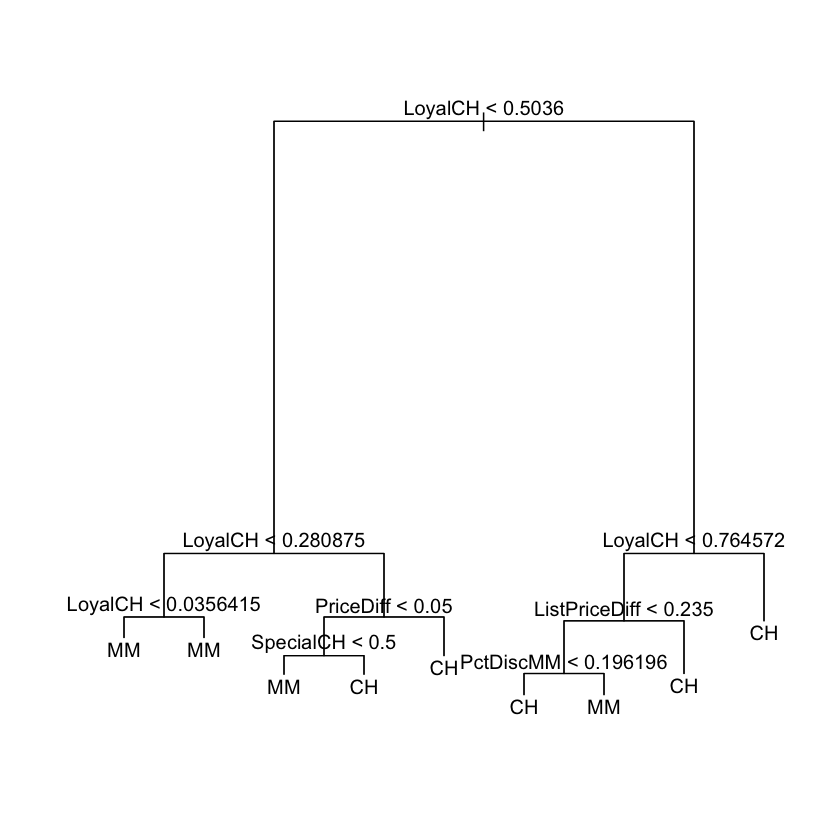

In [16]:
# pdf("tree_ex1.pdf", width = 10, height = 5)
plot(tree.OJ)
text(tree.OJ, pretty = 0)
dev.off()

𝙻𝚘𝚢𝚊𝚕𝙲𝙷 (customer brand loyalty for CH) is the most important variable of the tree, in fact top 3 nodes contain 𝙻𝚘𝚢𝚊𝚕𝙲𝙷. 

If 𝙻𝚘𝚢𝚊𝚕𝙲𝙷<0.036, the tree predicts 𝙼𝙼. 

If 𝙻𝚘𝚢𝚊𝚕𝙲𝙷>𝟶.𝟽𝟼5, the tree predicts 𝙲𝙷. 

For intermediate values of 𝙻𝚘𝚢𝚊𝚕𝙲𝙷, the decision also depends on the value of 𝙿𝚛𝚒𝚌𝚎𝙳𝚒𝚏𝚏.



### 1.4 Predict the response on the test data, and produce the confusion matrix comparing the test labels to the predicted test labels. What is the error rate?

In [17]:
y_hat = predict( tree.OJ, newdata= OJ.test, type="class" ) # gives classification labels

In [18]:
head(y_hat)  # the predicted class labels for the testing data

[1] CH MM CH CH CH CH
Levels: CH MM

In [19]:
CM = table( y_hat, OJ.test$Purchase )   # confusion matrix
print(CM)

     
y_hat  CH  MM
   CH 160  38
   MM   8  64


Among all the testing data:
- there are 160 CH and 64 MM predicted correctly.
- there are (38 + 8 = 46) purchases are misclassified.

Results:
- the error rate is: (38+8)/270 = 0.17
- the classification accuracy: 1 - error rate = 0.83 

In [20]:
print( 'original tree: classificaion error rate on the test dataset:')

mean(y_hat!=OJ.test$Purchase) # Compare whether the predicted class is the same with the ground truth

[1] "original tree: classificaion error rate on the test dataset:"


[1] 0.1703704

In [21]:
#or
print( ( CM[1,2] + CM[2,1] ) / sum(CM) )

[1] 0.1703704


### 1.5 Apply the <font color="blue">cv.tree()</font> function to the training set in order to determine the optimal tree size. Produce plots with tree size and cross-validation classification error rate. Which tree size is chosen?

In [22]:
# The function cv.tree() performs cross-validation in order to 
# cv.tree() determine the optimal level of tree complexity; 
# cost complexity pruning is used in order to select a sequence of trees for consideration.

cv.OJ = cv.tree( tree.OJ, FUN=prune.misclass )  # FUN: The function to do the pruning.
cv.OJ

$size
[1] 9 8 7 4 2 1

$dev
[1] 150 150 149 158 172 315

$k
[1]       -Inf   0.000000   3.000000   4.333333  10.500000 151.000000

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

- size: the number of terminal nodes
- dev: corresponds to the cross-validation error rate
- k: the value of the cost-complexity parameter used 

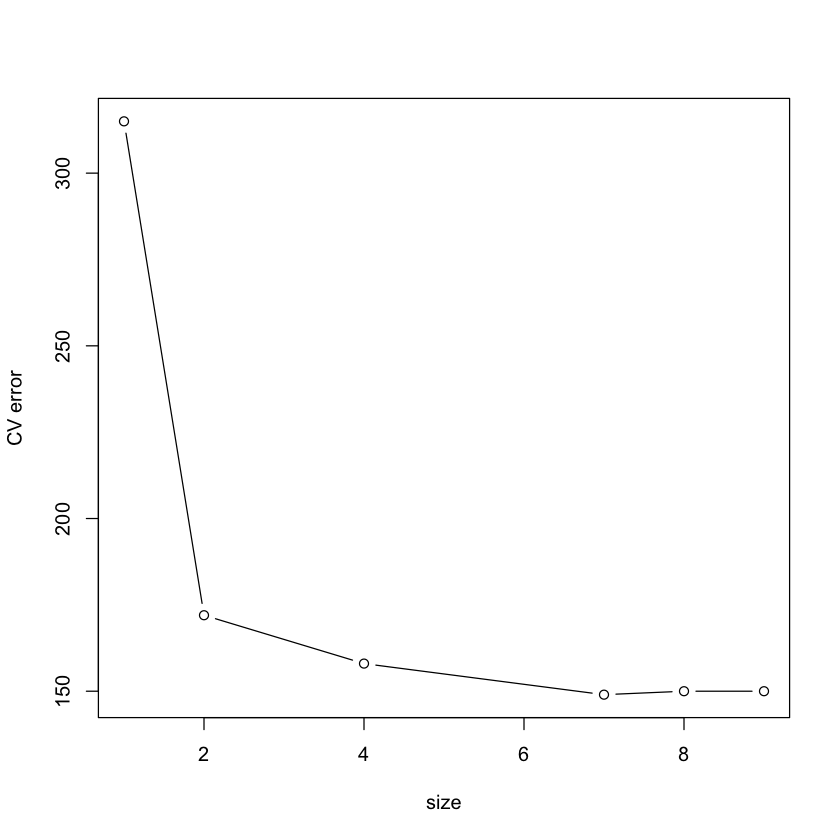

In [23]:
plot(cv.OJ$size, cv.OJ$dev, type ="b", xlab="size", ylab="CV error")

The best size number are 7

### 1.6 Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation.

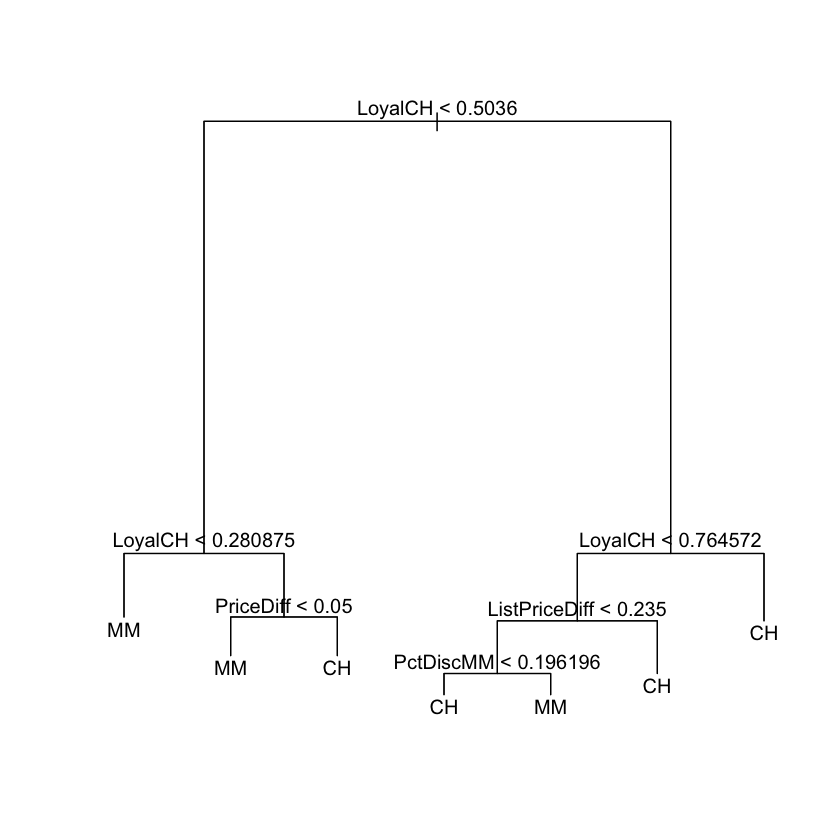

In [24]:
prune.OJ = prune.misclass(tree.OJ, best=7 )
#pdf(file="classfication_1.pdf", width = 10, height = 5)
plot(prune.OJ)
text(prune.OJ)
#dev.off()

### 1.7 Compare the training error rates between the pruned and unpruned trees. Which is higher?

In [25]:
summary(tree.OJ)


Classification tree:
tree(formula = Purchase ~ ., data = OJ.train)
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "SpecialCH"     "ListPriceDiff"
[5] "PctDiscMM"    
Number of terminal nodes:  9 
Residual mean deviance:  0.7432 = 587.8 / 791 
Misclassification error rate: 0.1588 = 127 / 800 

In [26]:
summary(prune.OJ)


Classification tree:
snip.tree(tree = tree.OJ, nodes = c(4L, 10L))
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "ListPriceDiff" "PctDiscMM"    
Number of terminal nodes:  7 
Residual mean deviance:  0.7748 = 614.4 / 793 
Misclassification error rate: 0.1625 = 130 / 800 

The train error for the original tree is 0.1588, while for the pruned tree is 0.1625. The residual mean deviance for the pruned tree is higher.

### 1.8 Compare the **testing error rates** between the pruned and unpruned trees. Which is higher?

In [27]:
y_hat.prune = predict( prune.OJ, newdata=OJ.test, type="class" ) # gives classification labels
CM.prune = table( y_hat.prune, OJ.test$Purchase )   # confusion matrix
print( CM.prune )

print( 'prune tree: classificaion error rate on the test dataset:')
# or print( ( CM.prune[1,2] + CM.prune[2,1] ) / sum(CM.prune) )
mean(y_hat.prune!=OJ[-train,]$Purchase)

           
y_hat.prune  CH  MM
         CH 160  36
         MM   8  66
[1] "prune tree: classificaion error rate on the test dataset:"


[1] 0.162963

- The error rate of unprunned tree is : 0.1703
- The error rate of prunned tree is: 0.163

The results shows the the prunned tree is more accurate. So not only has the pruning process produced a more interpretable tree, but it has also improved the classification accuracy.

## 2. Use boosting to predict Salary in the Hitters dataset 

In this task, we are going to study how to fit a boosted regression tree.

### 2.1 Prepare the training and the testing datasets.
There are some observations for whom the salary information is unknown. We need to exclude those observations from the datasets. And then, log-transform the salaries.

In [28]:
?Hitters  #baseball data

In [29]:
dim(Hitters)

[1] 322  20

In [30]:
head(Hitters)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<fct>
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NA,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [31]:
sum(is.na(Hitters$Salary))  # there are 59 missing values on salary

[1] 59

In [32]:
Hitters <- na.omit(Hitters)  # drop the rows with missing salaries

In [33]:
Hitters$Salary <- log(Hitters$Salary)   # do log transformation on salary

In [34]:
dim(Hitters)

[1] 263  20

As what you have done in the task 1 above, we generate the training and testing splits.

In [35]:
# use the first 200 data as training, and the remaining as testing data.
train <- 1:200
Hitters.train <- Hitters[train, ]
Hitters.test <- Hitters[-train, ]

### 2.2 Fit a boosted tree 
Perform boosting on the training set with 1000 trees for a range of values of the shrinkage parameter $\lambda$.
Produce twos plots:
* one with different shrinkage values on the x-axis and the corresponding **training set MSE** on the y-axis.
* one with different shrinkage values on the x-axis and the corresponding **testing set MSE** on the y-axis.

In [36]:
set.seed(1)

In [37]:
#  genernate values for lambdas
pows = seq(-10, -0.2, by = 0.1)

lambdas = 10^pows

length.lambdas = length(lambdas)

# save the results
train.errors = rep(NA, length.lambdas)
test.errors = rep(NA, length.lambdas)

Now, perform the boosting with the setting above.

In [38]:
for (i in 1:length.lambdas) {
    
#     1. fit the boosting model with different lambda
    boost.hitters = gbm(Salary ~ ., data = Hitters.train, distribution = "gaussian", n.trees = 1000, shrinkage = lambdas[i])
#     2. get results on training set
    train.pred = predict(boost.hitters, Hitters.train, n.trees = 1000)
#     3. get results on testing data
    test.pred = predict(boost.hitters, Hitters.test, n.trees = 1000)
#     4. save the MSE
    train.errors[i] = mean((Hitters.train$Salary - train.pred)^2)
    test.errors[i] = mean((Hitters.test$Salary - test.pred)^2)
}

Plot the training/testing MSE as a function of $\lambda$s results below

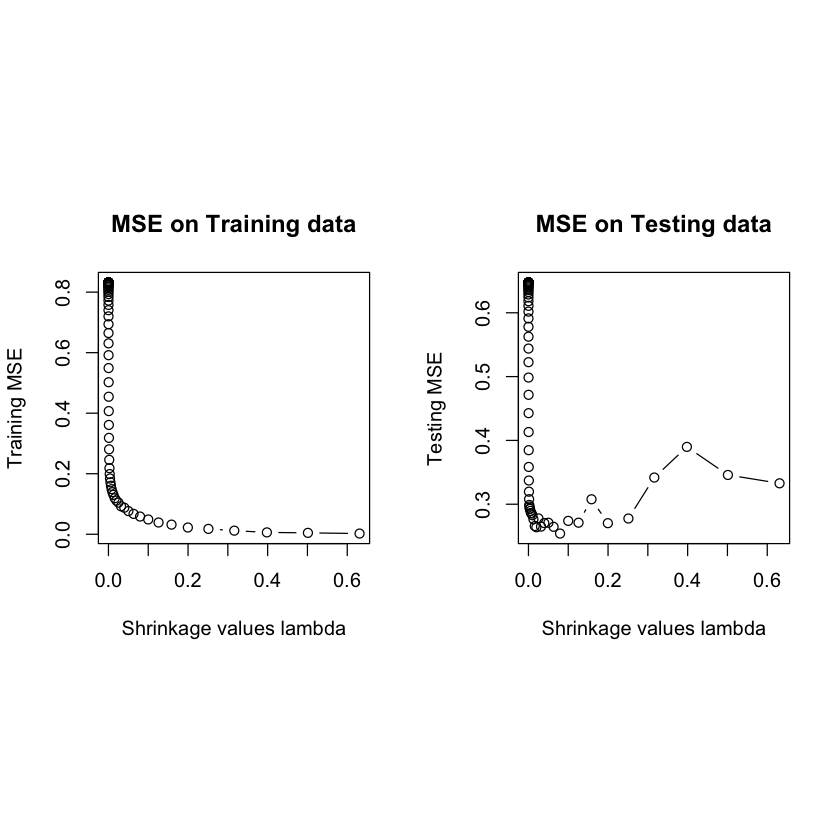

In [39]:
par(mfcol=c(1,2),  pty = "s")
plot(lambdas, train.errors, type = "b", xlab = "Shrinkage values lambda", ylab = "Training MSE",main = "MSE on Training data")
plot(lambdas, test.errors, type = "b", xlab = "Shrinkage values lambda", ylab = "Testing MSE",main = "MSE on Testing data")
# par("fig")

What is the min test error?

In [48]:
min(test.errors)

[1] 0.2540265

In [41]:
# get the best value for lambda
lambdas[which.min(test.errors)]

[1] 0.07943282

### 2.3 Comparison

Compare the test MSE of boosting to the test MSE that results from applying the regression approaches: 
* regression 
* lasso regression
* Ridge regression

In [42]:
# linear regression
fit1 <- lm(Salary ~ ., data = Hitters.train)
pred1 <- predict(fit1, Hitters.test)
mean((pred1 - Hitters.test$Salary)^2)

[1] 0.4917959

In [43]:
x <- model.matrix(Salary ~ ., data = Hitters.train)
x.test <- model.matrix(Salary ~ ., data = Hitters.test)
y <- Hitters.train$Salary

# alpha = 0 for ridge regression.
fit2 <- glmnet(x, y, alpha = 0)
pred2 <- predict(fit2, s = 0.01, newx = x.test)
mean((pred2 - Hitters.test$Salary)^2)

[1] 0.4570283

In [44]:
# alpha = 1 for lasso regression
fit3 <- glmnet(x, y, alpha = 1)
pred3 <- predict(fit3, s = 0.01, newx = x.test)
mean((pred3 - Hitters.test$Salary)^2)

[1] 0.4700537

Both linear model and regularization like Lasso have higher test MSE than boosting.

### 2.4 Which variables appear to be the most important predictors in the boosted model ?

,var,rel.inf
,<chr>,<dbl>
CAtBat,CAtBat,20.8404970
CRBI,CRBI,12.3158959
Walks,Walks,7.4186037
PutOuts,PutOuts,7.1958539
Years,Years,6.3104535
CWalks,CWalks,6.0221656
CHmRun,CHmRun,5.7759763
CHits,CHits,4.8914360
AtBat,AtBat,4.2187460


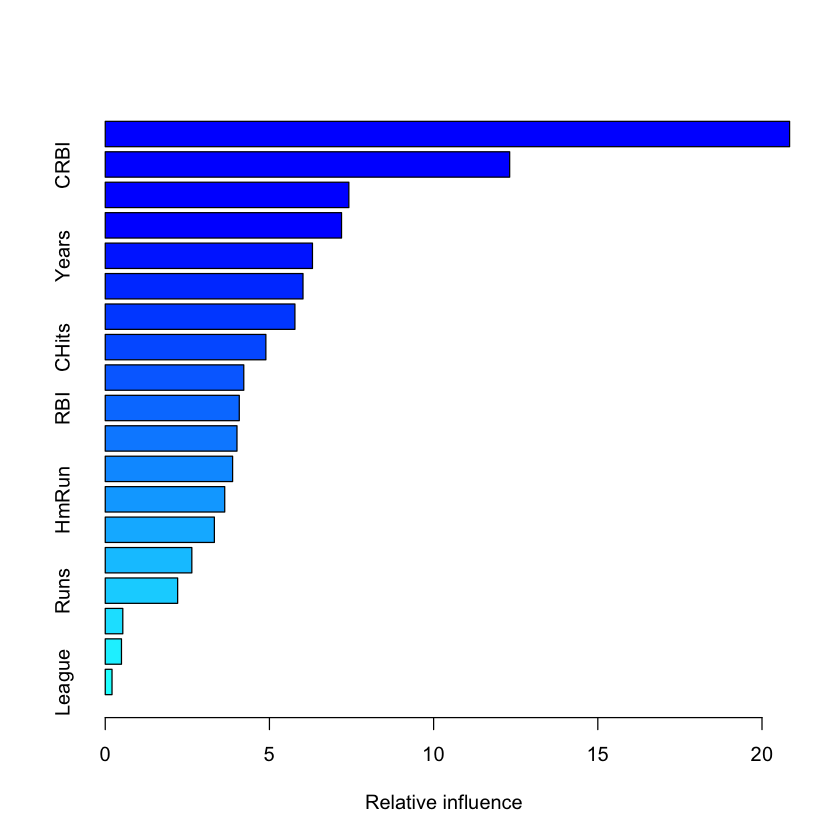

In [45]:
# build the boosting model with the best lambda

boost.hitters <- gbm(Salary ~ ., data = Hitters.train, distribution = "gaussian", n.trees = 1000, shrinkage = lambdas[which.min(test.errors)])
summary(boost.hitters)

We may see that “CAtBat” is by far the most important variable.

### 2.5 Now apply bagging to the training set. What is the test set MSE for this approach ?

In [47]:
set.seed(1)

bag.hitters <- randomForest(Salary ~ ., data = Hitters.train, mtry = 19, ntree = 500)

yhat.bag <- predict(bag.hitters, newdata = Hitters.test)

mean((yhat.bag - Hitters.test$Salary)^2)  #MSE

[1] 0.2299324

The test MSE for bagging is 0.23, which is slightly lower than the test MSE for boosting.